In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_formats = ['svg']

In [78]:
Lx = 1.0
Ly = 1.0
Nx = 11
Ny = 11
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
hx_square = dx**2
hy_square = dy**2

n = 4

D = 2 / hx_square + 2 / hy_square + 2

# Construct block matrices I, N, M, and A

In [79]:
I = np.eye(n)
N = np.zeros((n, n))
M = np.zeros((n, n))
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            if i == 1:
                M[i, j] = -1 / hx_square
            elif i == 2:
                M[i, j] = -1 / hy_square
            else:
                M[i, j] = 0
        else:
            M[i, j] = 0

        if i == j:
            if i == 0 or i == 3:
                A[i, j] = 1
            elif i == 1 or i == 2:
                if j == 1 or j == 2:
                    A[i, j] = D
                else:
                    A[i, j] = -1 / hx_square
        elif abs(i - j) == 1:
            if i == 1 or i == 2:
                A[i, j] = -1 / hx_square

# Construct the block matrix F

In [81]:
top_row = np.block([I, N, N])
middle_row = np.block([M, A, M])
bottom_row = np.block([N, N, I])
F = np.block([
    [top_row],
    [middle_row],
    [bottom_row]
])

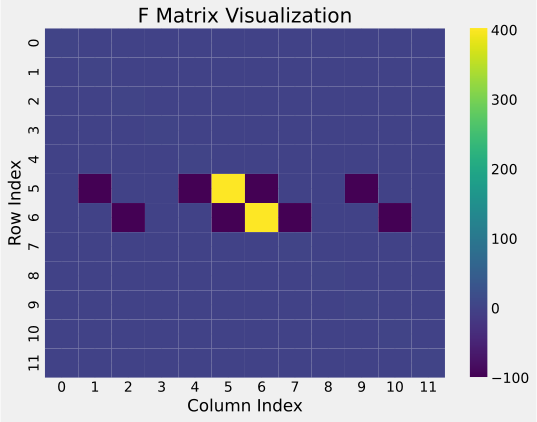

In [85]:
sns.heatmap(F, cmap='viridis')
plt.title('F Matrix Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

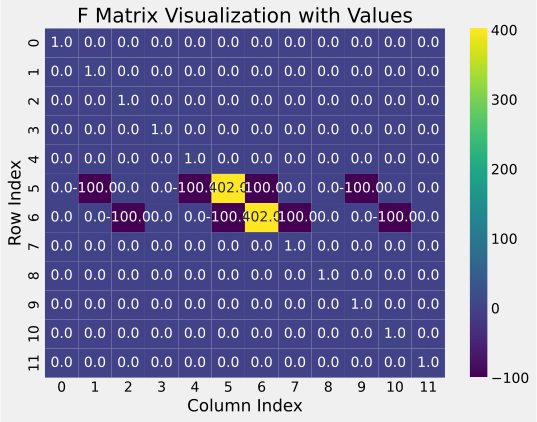

In [86]:
sns.heatmap(F, cmap='viridis', annot=True, fmt='.1f')
plt.title('F Matrix Visualization with Values')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

# Define boundary conditions and function f(x)

In [87]:
u_0 = 0.0
u_L = 2.0
f = lambda x: x**2

x = np.linspace(0, Lx, Nx+1)  # Adjust range for x

b = f(x)
b[0] = u_0
b[-1] = u_L

u = np.linalg.solve(F, b)

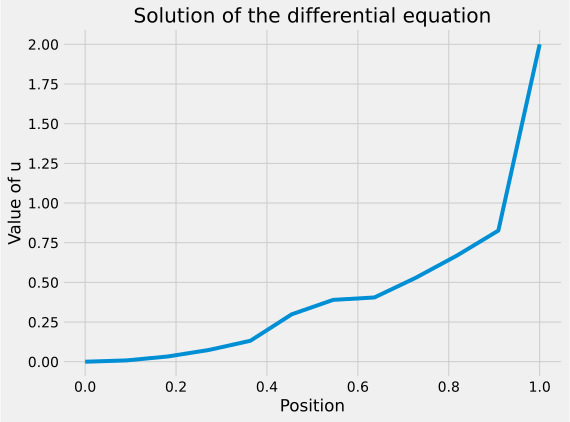

In [88]:
plt.plot(x, u)
plt.title('Solution of the differential equation')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.grid(True)
plt.show()

# Create time steps or iterations for 2D representation

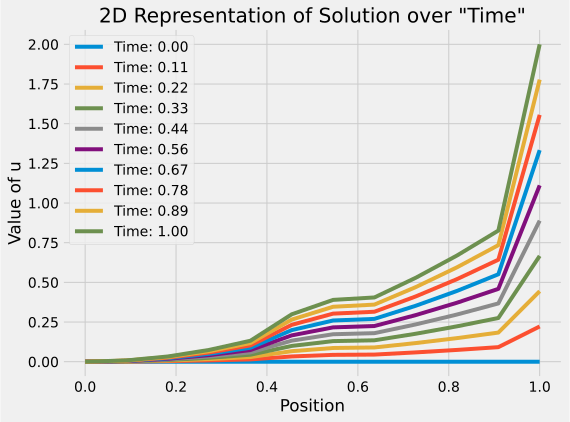

In [89]:
time_steps = np.linspace(0, 1, 10)
for t in time_steps:
    plt.plot(x, u * t, label=f'Time: {t:.2f}')

plt.title('2D Representation of Solution over "Time"')
plt.xlabel('Position')
plt.ylabel('Value of u')
plt.legend()
plt.grid(True)
plt.show()

# Create meshgrid for 3D plot

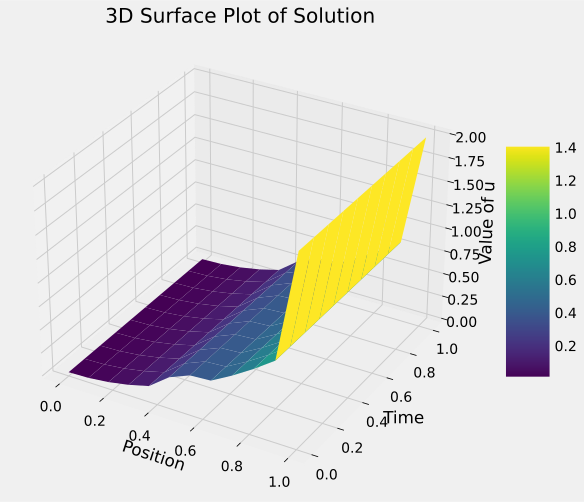

In [93]:
num_time_steps = 10
time_dimension = np.linspace(0, 1, num_time_steps)

u_3d = np.tile(u, (num_time_steps, 1))

x_3d, time_3d = np.meshgrid(x, time_dimension)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_3d, time_3d, u_3d, cmap='viridis')

ax.set_xlabel('Position')
ax.set_ylabel('Time')
ax.set_zlabel('Value of u')
ax.set_title('3D Surface Plot of Solution')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [95]:
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [96]:
print(N)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [97]:
print(M)

[[   0.    0.    0.    0.]
 [   0. -100.    0.    0.]
 [   0.    0. -100.    0.]
 [   0.    0.    0.    0.]]


In [98]:
print(A)

[[   1.    0.    0.    0.]
 [-100.  402. -100.    0.]
 [   0. -100.  402. -100.]
 [   0.    0.    0.    1.]]


In [99]:
print(F)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.    0.]
 [   0.    0. -100.    0.    0. -100.  402. -100.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]


In [100]:
print(b)

[0.         0.00826446 0.03305785 0.07438017 0.1322314  0.20661157
 0.29752066 0.40495868 0.52892562 0.66942149 0.82644628 2.        ]


In [102]:
print(f"Shape of I: {np.array(I).shape}")
print(f"Shape of N: {np.array(N).shape}")
print(f"Shape of M: {np.array(M).shape}")
print(f"Shape of A: {np.array(A).shape}")
print(f"Shape of F: {F.shape}")
print(f"Shape of b: {b.shape}")

Shape of I: (4, 4)
Shape of N: (4, 4)
Shape of M: (4, 4)
Shape of A: (4, 4)
Shape of F: (12, 12)
Shape of b: (12,)
